In [ ]:
pip install mysql-connector-python

In [53]:
import pandas as pd
import mysql.connector as sql
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
db_connection = sql.connect(host='127.0.0.0', database='db', user='root', password='password')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM dataset')

table_rows = db_cursor.fetchall()
file = pd.DataFrame(table_rows) '''

## Reading the file

# Copying the file to prevent accidental changes.

In [64]:
data = file.copy()
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 707 non-null    object 
 1   Year                    707 non-null    int64  
 2   Life_Expectancy         707 non-null    float64
 3   Adult_Mortality         707 non-null    int64  
 4   Alcohol                 707 non-null    float64
 5   Percentage_Expenditure  707 non-null    float64
 6   BMI                     707 non-null    float64
 7   Total_Expenditure       707 non-null    float64
 8   GDP                     707 non-null    float64
 9   Population              707 non-null    int64  
 10  Schooling               707 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 60.9+ KB


,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0


# Plotting the Corelation Matrix to get better insights.
#Based on our observation on the Corelation Matrix obtained we will choose various variables for our model.

In [16]:
data.corr() 
#Plotting the Corelation Matrix to get better insights.
#Based on our observation on the Corelation Matrix obtained we will choose various variables 

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.055936,-0.035259,-0.160970,0.013894,0.036295,0.018778,0.020748,0.048307,0.055423
Life_Expectancy,0.055936,1.000000,-0.751148,0.478888,0.427136,0.548947,0.257310,0.471575,-0.034404,0.801730
Adult_Mortality,-0.035259,-0.751148,1.000000,-0.253955,-0.270039,-0.416356,-0.148852,-0.298142,0.024392,-0.558152
Alcohol,-0.160970,0.478888,-0.253955,1.000000,0.387217,0.324022,0.257711,0.436485,-0.032376,0.599283
Percentage_Expenditure,0.013894,0.427136,-0.270039,0.387217,1.000000,0.242853,0.277196,0.940297,-0.033992,0.425707
BMI,0.036295,0.548947,-0.416356,0.324022,0.242853,1.000000,0.177937,0.273065,-0.083094,0.534159
Total_Expenditure,0.018778,0.257310,-0.148852,0.257711,0.277196,0.177937,1.000000,0.272106,-0.077060,0.280332
GDP,0.020748,0.471575,-0.298142,0.436485,0.940297,0.273065,0.272106,1.000000,-0.036691,0.484713
Population,0.048307,-0.034404,0.024392,-0.032376,-0.033992,-0.083094,-0.077060,-0.036691,1.000000,-0.057181
Schooling,0.055423,0.801730,-0.558152,0.599283,0.425707,0.534159,0.280332,0.484713,-0.057181,1.000000


<AxesSubplot:>

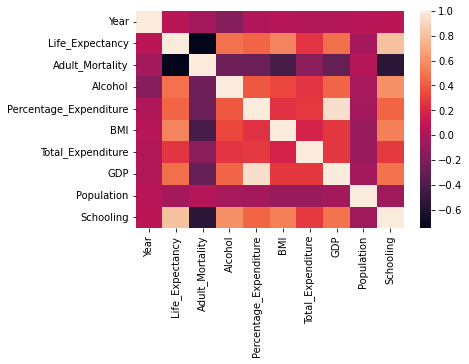

In [19]:
#Plotting the heatmap to have a visual representatin of our Coorelation Matrix
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# HEATMAP

In [57]:
#Created a Linear Model from sklearn libary

lin_reg_model = LinearRegression()
y = data['Life_Expectancy'].values.reshape(-1,1)

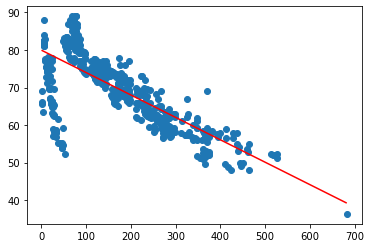

Mean Squared Error:  122764.170538361
Root Mean Squared Error:  350.3771832445158
R2 Score  0.5642234434438707
Model Equation : y = -0.059759966142484564 x + 79.97218981181695
Where Slope = -0.059759966142484564 
Intercept = 79.97218981181695


In [78]:
#X = Adult Mortality
x = data.Adult_Mortality.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.Adult_Mortality),max(data.Adult_Mortality)).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()

#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )

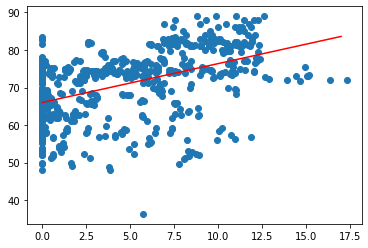

Mean Squared Error:  4397.267282761441
Root Mean Squared Error:  66.31189397658191
R2 Score  0.22933384569354576
Model Equation : y = 1.035864310383005 x + 66.00678628713952
Where Slope = 1.035864310383005 
Intercept = 66.00678628713952


In [79]:
#X = Alcohol
x = data.Alcohol.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.Alcohol),max(data.Alcohol)).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()


#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )

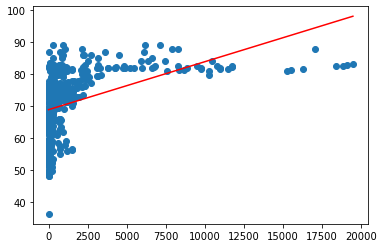

Mean Squared Error:  124767590.63668308
Root Mean Squared Error:  11169.941389133744
R2 Score  0.18244520340149972
Model Equation : y = 0.0015007079679564452 x + 68.91083837385924
Where Slope = 0.0015007079679564452 
Intercept = 68.91083837385924


In [80]:
#X = Percentage_Expenditure
x = data.Percentage_Expenditure.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.Percentage_Expenditure),max(data.Percentage_Expenditure)).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()


#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )

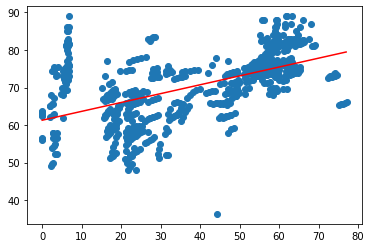

Mean Squared Error:  1311.7473230203739
Root Mean Squared Error:  36.21805244654072
R2 Score  0.301343087099337
Model Equation : y = 0.23624568858648645 x + 61.28011728908278
Where Slope = 0.23624568858648645 
Intercept = 61.28011728908278


In [81]:
#X = BMI 
x = data.BMI.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.BMI ),max(data.BMI )).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()


#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )

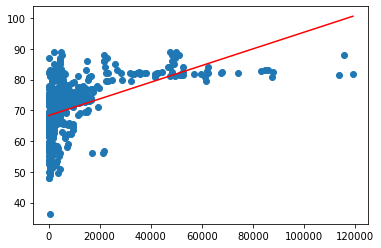

Mean Squared Error:  4723670841.625562
Root Mean Squared Error:  68728.96653977537
R2 Score  0.222382925948318
Model Equation : y = 0.00027124291132882343 x + 68.29218749386874
Where Slope = 0.00027124291132882343 
Intercept = 68.29218749386874


In [82]:
#X = GDP  
x = data.GDP.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.GDP  ),max(data.GDP  )).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()


#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )

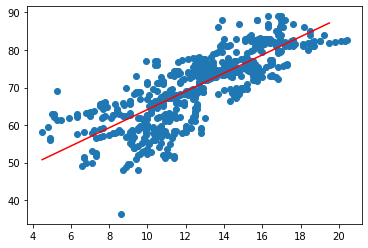

Mean Squared Error:  3290.175489513466
Root Mean Squared Error:  57.36005133813485
R2 Score  0.6427713989793805
Model Equation : y = 2.428981465040257 x + 39.832773872890975
Where Slope = 2.428981465040257 
Intercept = 39.832773872890975


In [77]:
#X = Schooling   
x = data.Schooling.values.reshape(-1,1)
lin_reg_model.fit(x,y)

#Predicted Line info 
x_array = np.arange(min(data.Schooling),max(data.Schooling)).reshape(-1,1)  
plt.scatter(x,y)
y_head = lin_reg_model.predict(x_array)                           
plt.plot(x_array,y_head,color="red")
plt.show()


#Printing the various metrics
print("Mean Squared Error: ", mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))
print("R2 Score " ,r2_score(y, lin_reg_model.predict(x)))
print("Model Equation : y =",lin_reg_model.coef_[0][0],"x +",*lin_reg_model.intercept_)
print("Where Slope =",lin_reg_model.coef_[0][0], "\nIntercept =",*lin_reg_model.intercept_ )